<h1> Atharva Jagdale </h1>
<h1> 20BCM007 </h1>
<h1> DM ASSIGNMENT 1 </h1>


The dataset contains information about all the restaurants  present in Bangalore. The fields present are url,address,name,online_order,book_table,rate,votes,phone_no,location,city,dish_liked,cuisines,cost,reviews,menu_Item,listed_in_city.
URL contains the url of the listed restaurant on Zomato.Address contains the address of the restaurant. Name has the name of the restaurant.Online_order tells if the restaurant delivers online or not.book_table says if we can book a table in that restaurant or not,Rate tells the rating og the restaurant out of 5.Votes tells the no. of votes the restaurant has received on Zomato.Phone contains the phone number of the restaurant.Location tells the location of the restaurant.Rest_type tells the type of restaurant .Cuisine shows the main cuisine of the restaurant.approx_cost tells the approximate cost of dining for two people.Listed_in shows teh listed category of the restaurant in Zomato.

The aim of the data analysis of this dataset is to figure out which type of restaurants are trending in the city. Which locality is best , which cuisine is generally preferred by public and what should be the average expense of the restaurant? These questions are answered by the following analysis.

In [228]:
import pandas as pd

In [229]:
df = pd.read_csv('/kaggle/input/zomato-bangalore-restaurants/zomato.csv')

In [230]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


<h3> General Stats of the Data </h3>

In [231]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


#  **Dropping Unncessary Columns**

In [232]:
df = df.drop(['url','dish_liked','phone'],axis=1) 

# Removing Duplicates

In [233]:
df.duplicated().sum()

43

In [234]:
df.drop_duplicates(inplace=True)

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51674 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      51674 non-null  object
 1   name                         51674 non-null  object
 2   online_order                 51674 non-null  object
 3   book_table                   51674 non-null  object
 4   rate                         43907 non-null  object
 5   votes                        51674 non-null  int64 
 6   location                     51653 non-null  object
 7   rest_type                    51447 non-null  object
 8   cuisines                     51629 non-null  object
 9   approx_cost(for two people)  51329 non-null  object
 10  reviews_list                 51674 non-null  object
 11  menu_item                    51674 non-null  object
 12  listed_in(type)              51674 non-null  object
 13  listed_in(city)              51

# Handling Null Values

In [236]:
df.isnull().sum()

address                           0
name                              0
online_order                      0
book_table                        0
rate                           7767
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     345
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

Transforming column names first

In [237]:
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})

In [238]:
df.dtypes

address         object
name            object
online_order    object
book_table      object
rate            object
votes            int64
location        object
rest_type       object
cuisines        object
cost            object
reviews_list    object
menu_item       object
type            object
city            object
dtype: object

Filled Null locations with previous location as the entries are done with alphabetical order of location names. High Chance of setting correct area name with forward fill

In [239]:
df['location'].fillna(method='ffill',inplace=True)

Removing ',' from cost

In [240]:
df['cost'] = df['cost'].astype(str)
df['cost'] = df['cost'].apply(lambda x: x.replace(',','.'))


In [241]:
df['cost'] = df['cost'].astype(float)

# Z-Score calculation for cost column

In [242]:
zdf = df['cost']

In [243]:
mean = zdf.mean()
std = zdf.std()
normalized_dataset = (zdf - mean) / std

In [244]:
import matplotlib.pyplot as plt

<BarContainer object of 51674 artists>

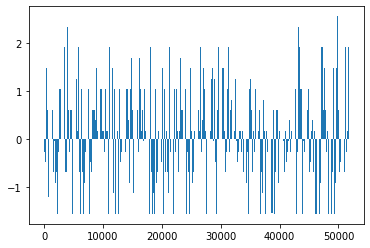

In [245]:
plt.bar(df.index,normalized_dataset)

<h3>Handling null values of cost with interpolation

In [246]:
df['cost'] = df['cost'].interpolate(method='polynomial',order=3)

Seperating data with cost greater than 50. less than 50Rs cost reataurants are undesirable

In [247]:
df = df[df['cost'] > 50]

In [248]:
df.isnull().sum()

address            0
name               0
online_order       0
book_table         0
rate            7637
votes              0
location           0
rest_type        220
cuisines          41
cost               0
reviews_list       0
menu_item          0
type               0
city               0
dtype: int64

Finally dropping all other rows with null values as they cannot be predicted or set in any other way

In [249]:
df.dropna(how='any',inplace=True)

In [250]:
df.isnull().sum()

address         0
name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
cost            0
reviews_list    0
menu_item       0
type            0
city            0
dtype: int64

In [251]:
import numpy as np

<h3> Removing '/5' from rate as it doesn;t help for calculations

In [252]:
df = df.loc[df.rate !='NEW']
df = df.loc[df.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
df.rate = df.rate.apply(remove_slash).str.strip().astype('float')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [253]:
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
34775    3.6
34776    3.7
34777    2.5
34778    3.7
34779    2.5
Name: rate, Length: 34780, dtype: float64

<h3> Adjust the column names

In [254]:
# Adjust the column names
df.name = df.name.apply(lambda x:x.title())
df.online_order.replace(('Yes','No'),(True, False),inplace=True)
df.book_table.replace(('Yes','No'),(True, False),inplace=True)


In [255]:
df

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34775,"Opposite Brookefield Mall, Kundanhalli, Brooke...",Raapchick,True,False,3.6,49,Brookefield,Quick Bites,"Fast Food, Burger",300.0,"[('Rated 5.0', ""RATED\n I was randomly lookin...","['Chicken Wrap', 'Veg Crunch Burger', 'Spicy P...",Dine-out,Whitefield
34776,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar N Grill,False,False,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800.0,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Drinks & nightlife,Whitefield
34777,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,False,False,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Drinks & nightlife,Whitefield
34778,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar N Grill,False,False,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800.0,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield


In [256]:
#Encode the input Variables
def Encode(df):
    for column in df.columns[~df.columns.isin(['rate', 'cost', 'votes'])]:
        df[column] = df[column].factorize()[0]
    return df

df_en = Encode(df.copy())

In [257]:
import matplotlib.pyplot as plt #It is a Plotting Library
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib.
from sklearn.linear_model import LogisticRegression #Logistic Regression is a Machine Learning classification algorithm
from sklearn.linear_model import LinearRegression #Linear Regression is a Machine Learning classification algorithm
from sklearn.model_selection import train_test_split #Splitting of Dataset
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

<h3> Correlation

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

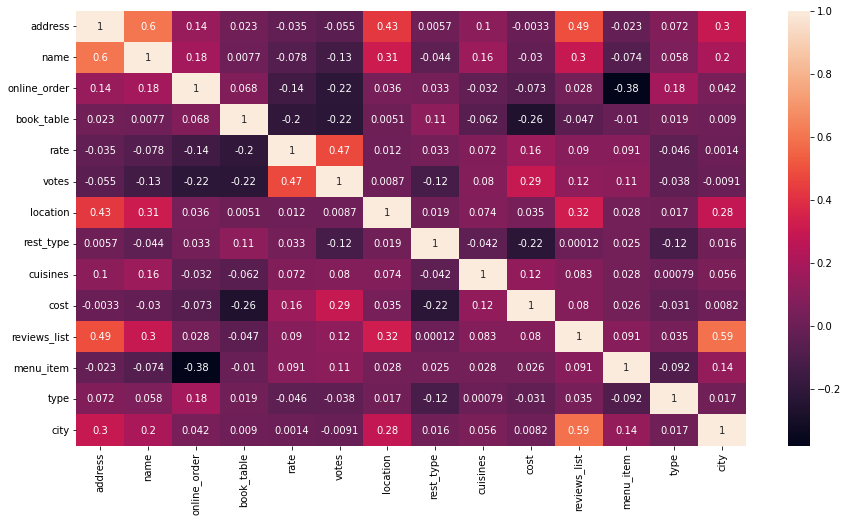

In [258]:
#Get Correlation between different variables

corr = df_en.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df_en.columns

In [259]:
#Defining the independent variables and dependent variables

x = df_en.iloc[:,[2,3,5,6,7,8,9,11]]
y = df_en['rate']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()

3245     3.3
19775    3.6
30503    3.9
2401     4.0
12654    3.3
Name: rate, dtype: float64

<h3> Linear Model

<h4>We can predict the rating of a restaurant with various other paramenters using ML Model which can help in our decision making

In [260]:
#Prepare a Linear REgression Model

reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.17612371775642188

In [261]:
y_pred

array([3.93464756, 3.57267664, 3.65247542, ..., 3.46985723, 3.60171754,
       3.69634615])

<h3> Decision Tree

In [262]:
#Prepairng a Decision Tree Regression

from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.7699673313747959

# Analyzing from Visualizations

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Location')

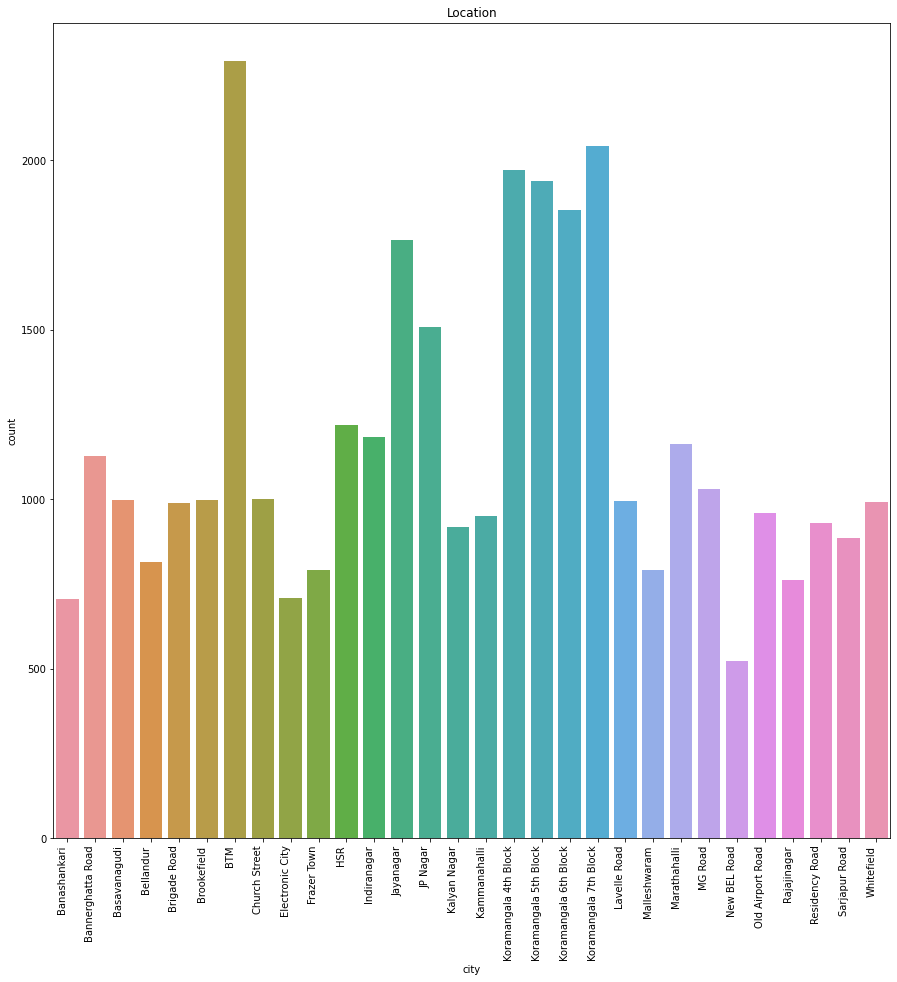

In [263]:
# Location
sns.countplot(df['city'])
sns.countplot(df['city']).set_xticklabels(sns.countplot(df['city']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Location')

<h4> Restaurants with online ordering options

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Restaurants delivering online or Not')

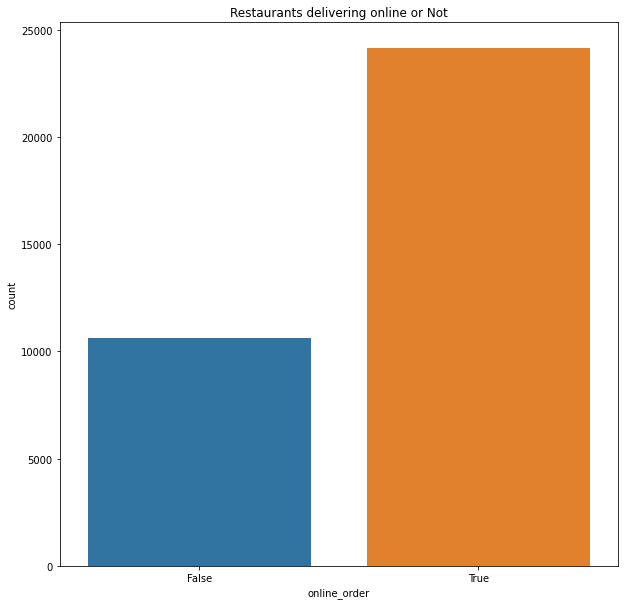

In [264]:
#Restaurants delivering Online or not
sns.countplot(df['online_order'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')

<h4> Locations with online ordering options

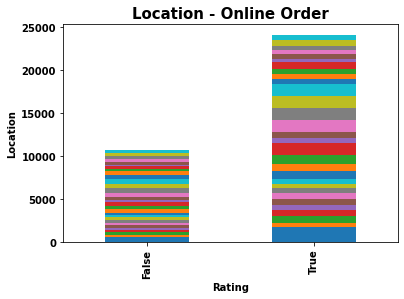

In [265]:
#Location and Delivery
loc_plt=pd.crosstab(df['online_order'],df['city'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Location - Online Order',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();


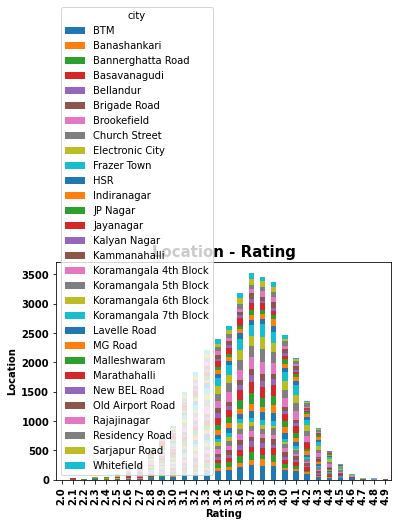

In [266]:
#Location and Rating
loc_plt=pd.crosstab(df['rate'],df['city'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Location - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
# plt.legend().remove();

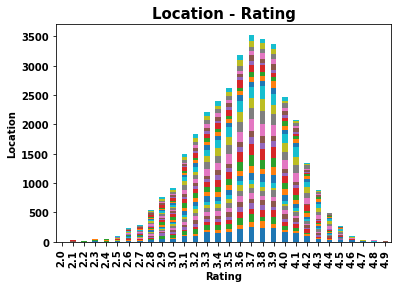

In [267]:
#Location and Rating
loc_plt=pd.crosstab(df['rate'],df['city'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Location - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();

In [268]:
df['cuisines'] = df['cuisines'].astype("string")

In [269]:
df.dtypes

address          object
name             object
online_order       bool
book_table         bool
rate            float64
votes             int64
location         object
rest_type        object
cuisines         string
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

In [270]:
cuisine = df[(df['cuisines'] == "South Indian") | (df['cuisines'] == "North Indian")]

In [271]:
cuisine

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
5,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,True,False,3.8,286,Basavanagudi,Casual Dining,North Indian,600.0,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
39,"556/A, Water Tank Road, 3rd Stage, Banashankar...",Maruthi Davangere Benne Dosa,True,False,4.0,17,Banashankari,Quick Bites,South Indian,150.0,"[('Rated 5.0', ""RATED\n This restaurant serve...","['Benne Dosa', 'Benne Masala Dosa', 'Benne Kal...",Delivery,Banashankari
41,"Opp Vinayaka hospital, Near Seetha Circle , 80...",Havyaka Mess,False,False,3.9,28,Banashankari,Mess,South Indian,300.0,"[('Rated 4.0', 'RATED\n Food is good.very hom...",[],Delivery,Banashankari
50,"276, Ground Floor, 100 Feet Outer Ring Road, B...",Petoo,False,False,3.7,21,Banashankari,Quick Bites,North Indian,450.0,"[('Rated 2.0', 'RATED\n This is a neatly made...",[],Delivery,Banashankari
66,"30th Cross, 8th Main, Near Jain Temple, 4th Bl...",Namma Brahmin'S Idli,True,False,3.6,34,Jayanagar,Quick Bites,South Indian,100.0,"[('Rated 4.0', 'RATED\n Quite a cosy & small ...","['Tatte Idli', 'Butter Idli', 'Butter Pudi Idl...",Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34754,"Floor 2, Eminence Signature Towers, Survey 220...",The Andhra Bhojanam,True,False,3.3,7,"ITPL Main Road, Whitefield",Bhojanalya,South Indian,300.0,"[('Rated 2.0', ""RATED\n Visited only once whe...","['Chicken Pepper Dry', 'Poori [3 Pieces]', 'Ch...",Dine-out,Whitefield
34756,"4th Floor, Food Court, Ascendas Park Square, W...",Shaan-E-Punjab,True,False,2.9,84,"ITPL Main Road, Whitefield",Casual Dining,North Indian,500.0,"[('Rated 3.0', 'RATED\n Pretty average place ...","['Palak Paneer Combo', 'Chicken Tikka Combo', ...",Dine-out,Whitefield
34765,"Pattandur Agrahara, ITPL Main Road, Whitefield...",Khane Ka Khazana,True,False,3.5,17,"ITPL Main Road, Whitefield",Quick Bites,North Indian,250.0,"[('Rated 3.0', 'RATED\n Decent food at cheap ...",[],Dine-out,Whitefield
34766,"Satya Sai Complex Hoodi, ITPL Main Road, White...",Slv Grand,True,False,3.3,66,"ITPL Main Road, Whitefield",Quick Bites,South Indian,300.0,"[('Rated 1.0', ""RATED\n Very low quality food...","['Jeera Rice', 'Veg Pulao', 'Veg Biryani', 'Hy...",Dine-out,Whitefield


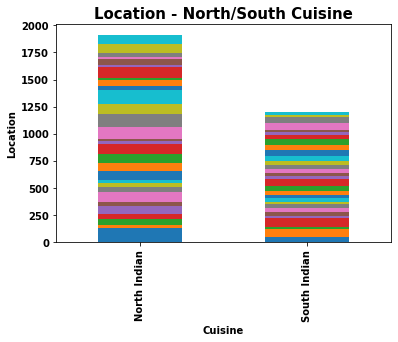

In [272]:
#Location and Cuisines

loc_plt=pd.crosstab(cuisine['cuisines'],cuisine['city'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Location - North/South Cuisine',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Cuisine',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();

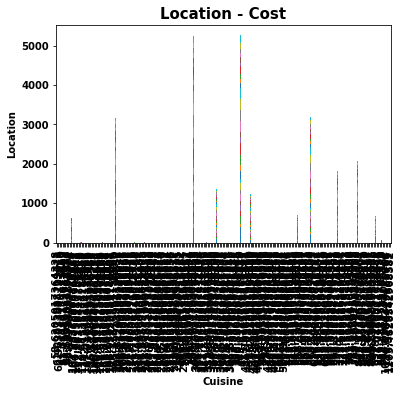

In [273]:
#Location and Cost

loc_plt=pd.crosstab(df['cost'],df['city'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Location - Cost',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Cuisine',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();

In [274]:
df['cost'].astype(float)

0        800.0
1        800.0
2        800.0
3        300.0
4        600.0
         ...  
34775    300.0
34776    800.0
34777    800.0
34778    800.0
34779    800.0
Name: cost, Length: 34780, dtype: float64

In [275]:
import scipy.stats as stats

# Outliers

In [276]:
zdf = df['cost']

In [277]:
Q1 = zdf.quantile(q=.25)
Q3 = zdf.quantile(q=.75)
IQR = zdf.apply(stats.iqr)

In [278]:
outlier = zdf[((zdf < (Q1-1.5*IQR)) | (zdf > (Q3+1.5*IQR)))]

In [279]:
outlier.shape

(13651,)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f554c430390>,
 'caps': [<matplotlib.lines.Line2D at 0x7f554c430a10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f554c430050>],
 'medians': [<matplotlib.lines.Line2D at 0x7f554c41f110>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f554c41f450>],
 'means': []}

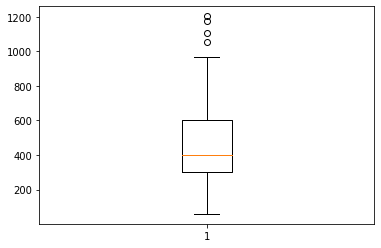

In [280]:
 plt.boxplot(zdf)


<h3>To remove Outliers

In [281]:
# df= df[(df['cost'] > (Q1-1.5*IQR)) & (df['cost'] < (Q3+1.5*IQR))]

In [282]:
df = df[df['cost'] > 0]

In [283]:
df.shape

(34780, 14)

# Gaussian Rest type and Rating

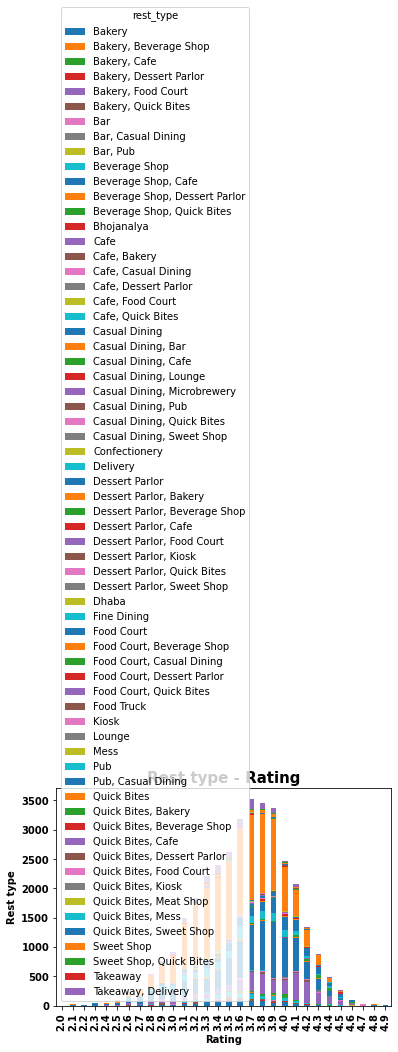

In [284]:
#Gaussian Rest type and Rating
loc_plt=pd.crosstab(df['rate'],df['rest_type'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Rest type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Rest type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
# plt.legend().remove();

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Type of Service')

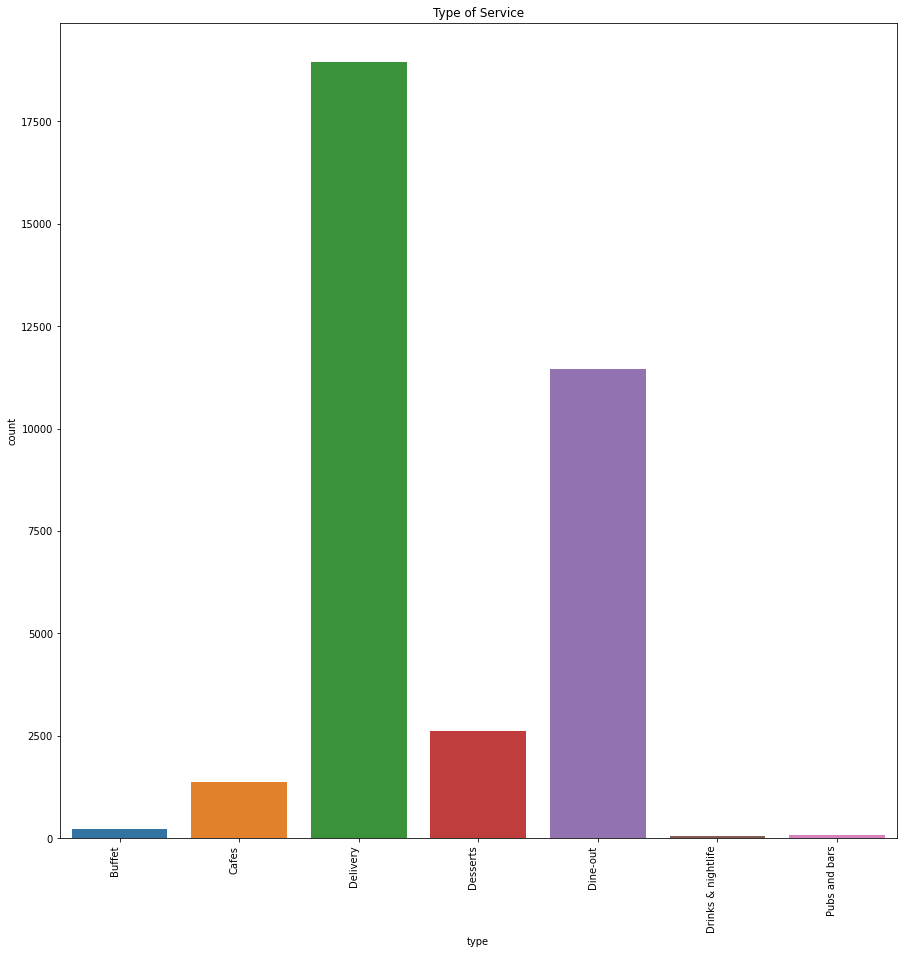

In [285]:
#Types of Services
sns.countplot(df['type'])
sns.countplot(df['type']).set_xticklabels(sns.countplot(df['type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Type of Service')

Text(0.5, 1.0, 'NO. of restaurants in a Location')

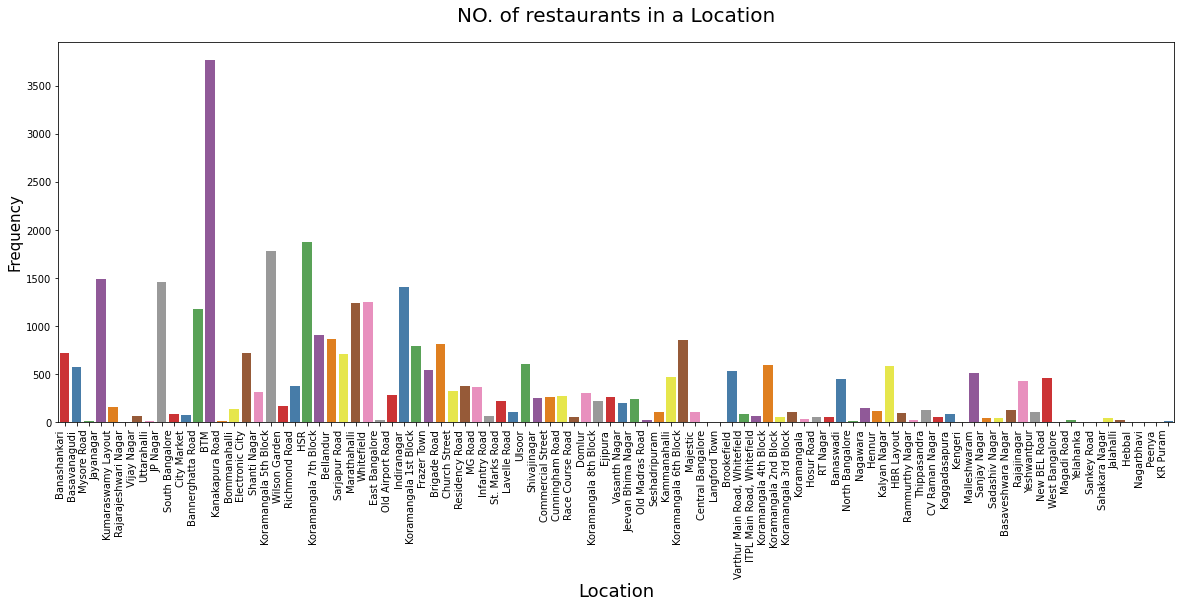

In [286]:
#NO. of restaurants in a Location',
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="location",data=df, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
loc
plt.title('NO. of restaurants in a Location',size = 20,pad=20)

# Getting location which is a hotspot using pie chart

<AxesSubplot:ylabel='city'>

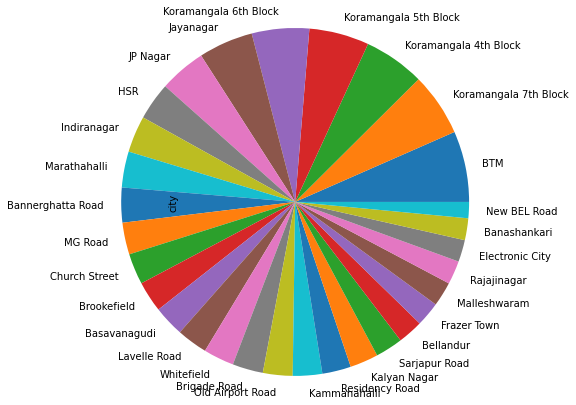

In [287]:
df['city'].value_counts().plot(kind='pie',radius=2)

<h3> Observation : - People like Quick Bites Restaurants </h3>

Text(0.5, 1.0, 'Restaurant types')

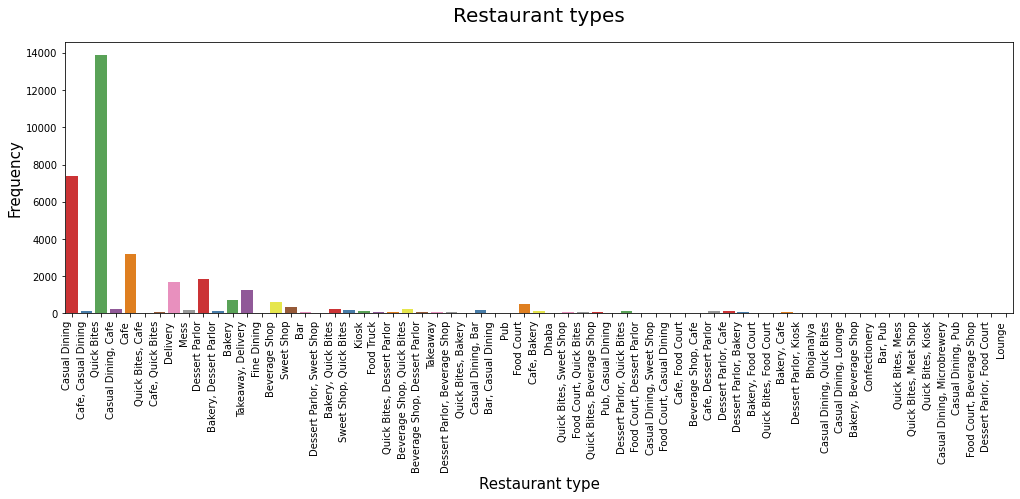

In [288]:
#Restaurant type
fig = plt.figure(figsize=(17,5))
rest = sns.countplot(x="rest_type",data=df, palette = "Set1")
rest.set_xticklabels(rest.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Restaurant type",size=15)
rest 
plt.title('Restaurant types',fontsize = 20 ,pad=20)

<h3> If one wants to open a franchise then he can go for Just Bake </h3>

Text(0.5, 0, 'Number of outlets')

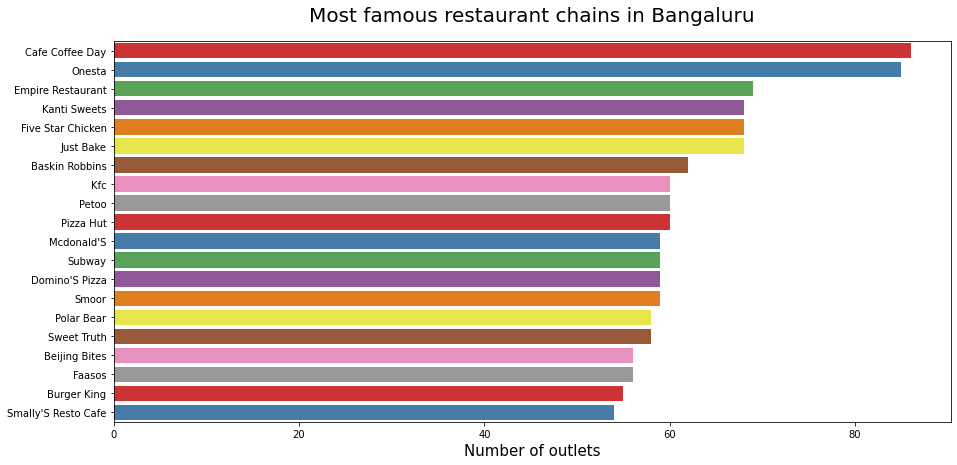

In [289]:
#Most famous restaurant chains in Bengaluru
plt.figure(figsize=(15,7))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

<h3> Analyzing best Restaurants of Bangalore </h3>

In [290]:
votes_mean = df['votes'].mean()

In [291]:
votes_mean

212.05819436457733

<h4> Restaurants with votes more than general mean is selected

In [292]:
result = df[df['votes'] > votes_mean]

<h4> Restaurant with less cost and High rating is selected first

In [293]:
df_Res = result.sort_values(['cost','rate'],ascending=[True,False])

In [294]:
df_Res.loc[:,['name','rate','cost','votes','city']]

,name,rate,cost,votes,city
25467,Punjabi By Nature 2.0,4.2,58.620502,3236,Koramangala 7th Block
22544,Boozers Bar & Kitchen,4.3,81.069891,700,Koramangala 6th Block
28331,The Hub - Ibis Bengaluru,3.9,87.726408,237,Marathahalli
25081,Kesar Sweet Shop And Fast Food,4.0,88.690691,213,Koramangala 7th Block
32657,Mighty Small,4.1,95.197351,259,Residency Road
...,...,...,...,...,...
32974,Bathinda Dine,3.9,950.000000,266,Sarjapur Road
33626,Bathinda Dine,3.9,950.000000,266,Sarjapur Road
1710,Inchara,3.7,950.000000,535,Bannerghatta Road
15643,Inchara,3.7,950.000000,536,JP Nagar


In [295]:
df_Res['cost'].mean()

573.9963776239615

Where are the good restaurants located?

In [296]:
df_Res['city'].value_counts()

Koramangala 4th Block    549
Koramangala 7th Block    541
BTM                      534
Koramangala 5th Block    507
Koramangala 6th Block    505
Jayanagar                405
Indiranagar              340
HSR                      294
JP Nagar                 291
Old Airport Road         270
Basavanagudi             250
MG Road                  229
Marathahalli             216
Brookefield              205
Church Street            205
Brigade Road             204
Lavelle Road             179
Malleshwaram             177
Residency Road           175
Bannerghatta Road        175
Kammanahalli             168
Banashankari             162
Kalyan Nagar             161
Frazer Town              155
Whitefield               146
Bellandur                145
Rajajinagar              138
Sarjapur Road            129
New BEL Road             112
Electronic City          107
Name: city, dtype: int64

In [297]:
df_Res['cuisines'].value_counts()

North Indian                                          454
North Indian, Chinese                                 241
South Indian                                          139
Cafe                                                   98
Ice Cream, Desserts                                    89
                                                     ... 
Chinese, Beverages, Momos, Thai                         1
Bengali, Biryani, North Indian, Chinese, Fast Food      1
North Indian, Chinese, Mughlai, Rolls                   1
Cafe, Burger, Fast Food                                 1
Fast Food, Pizza                                        1
Name: cuisines, Length: 672, dtype: Int64

In [298]:
out_area = df_Res['city'].to_csv('upd_map.csv')

In [299]:
df_Res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7674 entries, 25467 to 7560
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       7674 non-null   object 
 1   name          7674 non-null   object 
 2   online_order  7674 non-null   bool   
 3   book_table    7674 non-null   bool   
 4   rate          7674 non-null   float64
 5   votes         7674 non-null   int64  
 6   location      7674 non-null   object 
 7   rest_type     7674 non-null   object 
 8   cuisines      7674 non-null   string 
 9   cost          7674 non-null   float64
 10  reviews_list  7674 non-null   object 
 11  menu_item     7674 non-null   object 
 12  type          7674 non-null   object 
 13  city          7674 non-null   object 
dtypes: bool(2), float64(2), int64(1), object(8), string(1)
memory usage: 794.4+ KB


#

# SUMMARY

<h3> It can be observed that most good restaurants are at locations like Jaynagar, Indiranagar and Koramangala which are growing Tech Hubs of various Startups. Usually North Indian Cuisine is preffered here with average cost at these Reataurants being Rs.452 </h3>

Great locations visualized on Google Maps

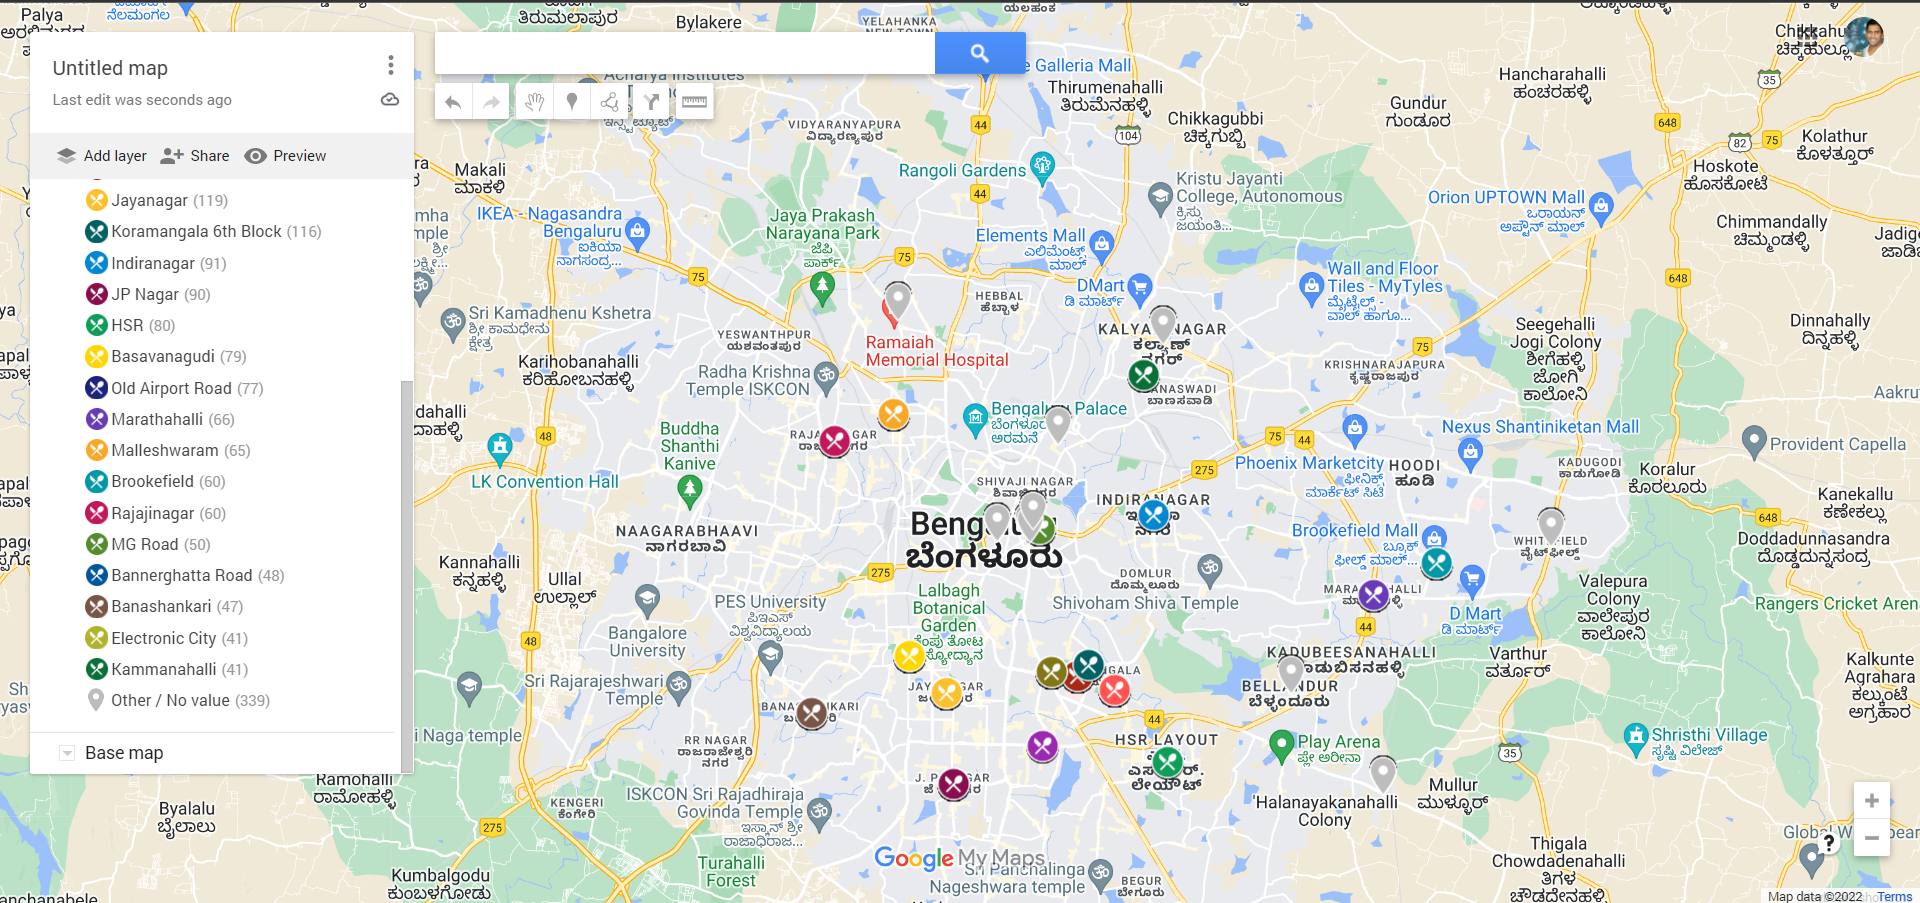